In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
def load_result(base_lr, mbs, bs, seeds=[1, 111, 11111], adamSTD=False, kmax=None):
    if kmax:
        base_str = f'NanoGPTlr_{{}}__mbs_{{}}__bs_{{}}__kmax_{kmax}'
    else:
        base_str = 'NanoGPTlr_{}__mbs_{}__bs_{}'
    
    if adamSTD:
        base_str += 'adamSTD__'
    name_template = './results/' + base_str + 'seed_{}___{}.npy'
    train_logs = []
    test_logs = []
    for seed in seeds:
        if os.path.exists(name_template.format(base_lr, mbs, bs, seed, 'train')):
            train_logs.append(np.load(name_template.format(base_lr, mbs, bs, seed, 'train')))
            test_logs.append(np.load(name_template.format(base_lr, mbs, bs, seed, 'test')))
    return np.stack(train_logs), np.stack(test_logs)

In [4]:
lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
bs_list = [64, 128, 256, 512]

In [5]:
R = load_result(1e-5, 64, 64, [1, 111, 11111], kmax=1, adamSTD=True)
plt.plot(np.arange(0, 200, 4), R[0].mean(0).squeeze(), label=f'{b}')

R = load_result(1e-5, 64, 128, [1, 111, 11111], kmax=1, adamSTD=True)
plt.plot(np.arange(0, 100, 2), R[0].mean(0).squeeze(), label=f'{b}')


R = load_result(1e-5, 64, 256, [1, 111, 11111], kmax=1, adamSTD=True)
plt.plot(R[0].mean(0).squeeze(), label=f'{b}')

NameError: name 'b' is not defined

In [57]:
X / 1000000

array([ 0.      ,  1.003854,  2.007708,  3.011562,  4.015416,  5.01927 ,
        6.023124,  7.026978,  8.030832,  9.034686, 10.03854 , 11.042394,
       12.046248, 13.050102, 14.053956, 15.05781 , 16.061664, 17.065518,
       18.069372, 19.073226, 20.07708 , 21.080934, 22.084788, 23.088642,
       24.092496, 25.09635 , 26.100204, 27.104058, 28.107912, 29.111766,
       30.11562 , 31.119474, 32.123328, 33.127182, 34.131036, 35.13489 ,
       36.138744, 37.142598, 38.146452, 39.150306, 40.15416 , 41.158014,
       42.161868, 43.165722, 44.169576, 45.17343 , 46.177284, 47.181138,
       48.184992, 49.188846])

In [41]:
thresholds = np.arange(2.0, 3.5, 0.1)

def find_min_step_required(t, x):
    bs = x[:, 0]
    l = x[:, 1:]
    target_step = np.argmax(l < t, -1) * (1003854 // (bs * 256))
    return target_step[target_step > 0].min()

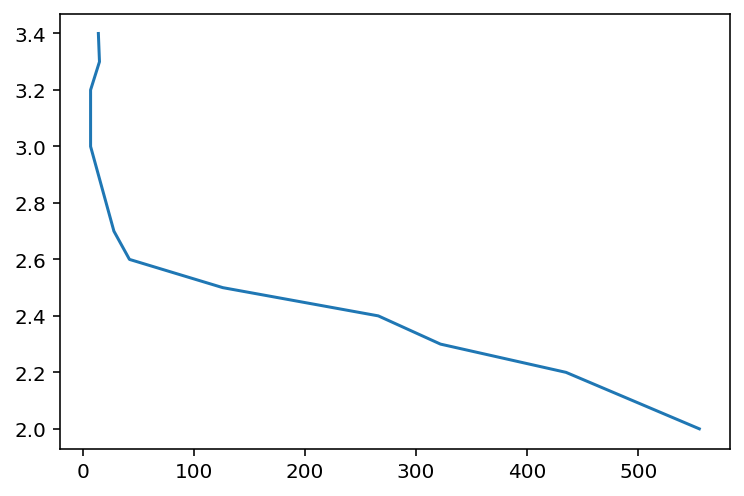

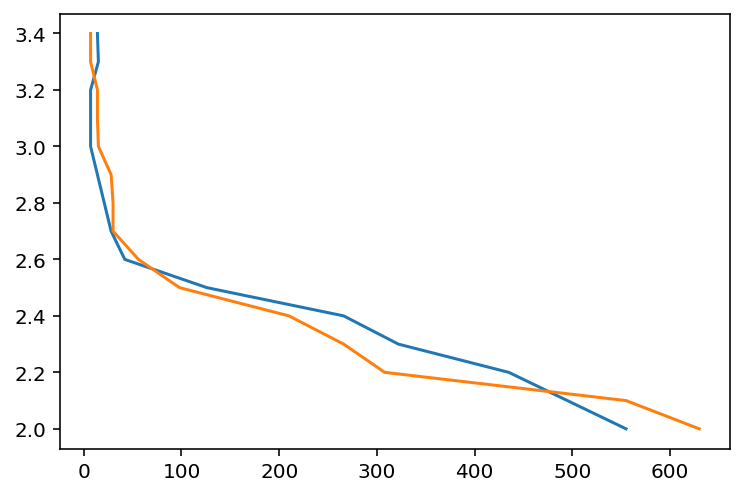

In [50]:
lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
bs_list = [64, 128, 256, 512]

logs = []

for i, lr in enumerate(lrs):
    for j, bs in enumerate(bs_list):
        X = np.arange(50) * (1003854 // (bs * 256))
        R = load_result(lr, 64, bs, [1, 111, 11111], kmax=1, adamSTD=False)[1].mean(0)
        R = np.concatenate([np.array([bs]), R])
        logs.append(R)
logs = np.array(logs)

steps = []
for t in thresholds:
    steps.append(find_min_step_required(t, logs))
plt.plot(steps, thresholds)

logs = []
for i, lr in enumerate(lrs):
    for j, bs in enumerate(bs_list):
        X = np.arange(50) * (1003854 // (bs * 256))
        R = load_result(lr, 64, bs, [1, 111, 11111], kmax=1, adamSTD=True)[1].mean(0)
        R = np.concatenate([np.array([bs]), R])
        logs.append(R)
logs = np.array(logs)

steps = []
for t in thresholds:
    steps.append(find_min_step_required(t, logs))
plt.plot(steps, thresholds)

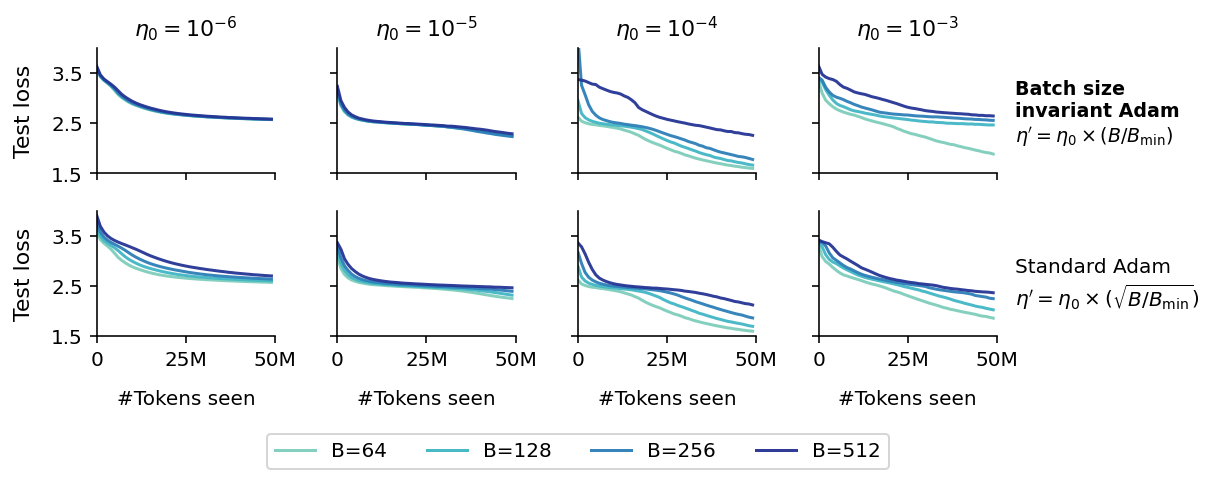

In [6]:
fig, ax = plt.subplots(2, 4, figsize=(6.25, 2.0), sharex='col', sharey='row')
bottom = 0.0
top = 1.0
left = 0.0
right = 1.0
fig.subplots_adjust(wspace=0.35, hspace=0.3, left=left, right=right, bottom=bottom, top=top)
lrs = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2][:4]
bs_list = [64, 128, 256, 512]

colors = ['#ffffcc','#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494'][-4:]

# lrs_list = [1e-6, 1e-5, 1e-4, 1e-3]
# lrs_list = [1e-6, 1e-5, 1e-3, 1e-1]
for i, lr in enumerate(lrs):
    for j, bs in enumerate(bs_list):
        R = load_result(lr, 64, bs, [1, 111, 11111], kmax=1, adamSTD=False)
        ax[0, i].plot(R[1].mean(0).squeeze(), label=f'B={bs}', alpha=0.95, linewidth=1.5, c=colors[j])
        
        R = load_result(lr, 64, bs, [1, 111, 11111], kmax=1, adamSTD=True)
        ax[1, i].plot(R[1].mean(0).squeeze(), label=f'B={bs}', alpha=0.95, linewidth=1.5, c=colors[j])



for a in ax.flatten():
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    
for j in range(2):
    ax[j, 0].yaxis.set_label_coords(-0.35, 0.5)
    ax[j, 0].set_ylabel('Test loss', fontsize=11)
    ax[j, 0].set_ylim(1.5, 4)
    ax[j, 0].set_yticks([1.5, 2.5, 3.5])
    

for i in range(4):
    ax[1, i].set_xlabel('#Tokens seen', fontsize=10, labelpad=10)
    ax[1, i].set_xticks([0, 25, 50])
    ax[1, i].set_xticklabels(['0', '25M', '50M'])
    ax[1, i].set_xlim(0, 50)
    ax[0, i].set_title(r'$\eta_0=$' + '$10^{{{}}}$'.format(int(np.log10(lrs[i]))), fontsize=11)
    
for a in ax.flatten():
    a.tick_params(axis='both', labelsize=10)
    
ax[0, -1].text(1.1, 0.2,
        'Batch size\ninvariant Adam\n' + r'$\eta^\prime = \eta_0 \times ({B / B_{\rm min} })$',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax[0, -1].transAxes, fontsize=9.5, weight='bold'
)

ax[1, -1].text(1.1, 0.2,
        'Standard Adam\n' + r'$\eta^\prime = \eta_0 \times (\sqrt{B / B_{\rm min} })$',
        verticalalignment='bottom', horizontalalignment='left',
        transform=ax[1, -1].transAxes, fontsize=10
)

ax[1, -1].legend(ncol=4,  bbox_to_anchor=(0.45, -0.7))

fig.savefig('./figs/nano_gpt_results.pdf', bbox_inches='tight')
# legend = ax[-1, -1].legend(loc='center right', bbox_to_anchor=(0.6, -1.0), ncol=6, fontsize=8)

(2.180637800693512, 3.5)

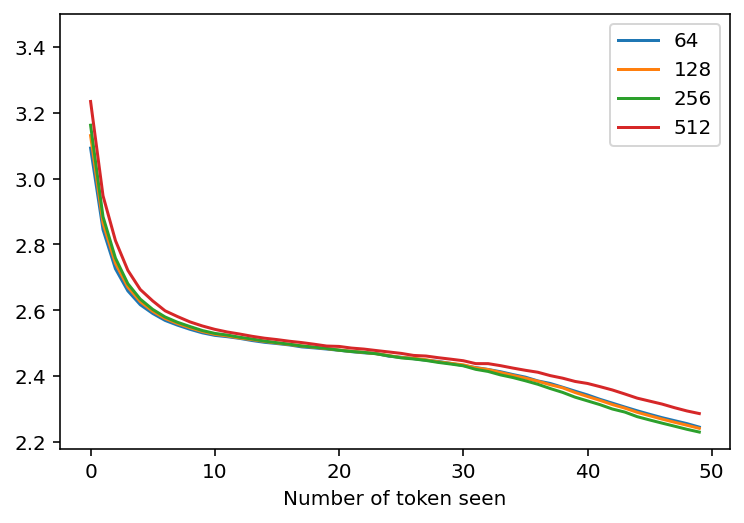

In [58]:
for b in bs_list:
    R = load_result(1e-5, 64, b, [1, 111, 11111], kmax=1, adamSTD=False)
    plt.plot(R[1].mean(0).squeeze(), label=f'{b}')
plt.legend()
plt.xlabel('Number of token seen')
plt.ylim(top=3.5)
plt.xlim

(2.0, 3.5)

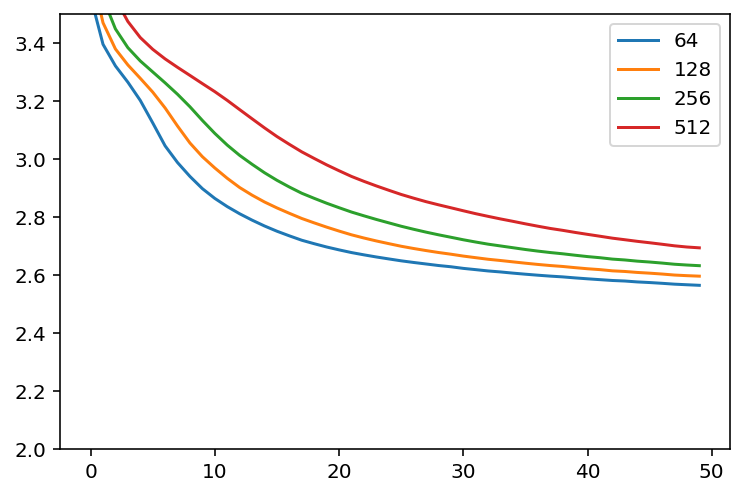

In [77]:
for b in bs_list:
    X = np.arange(50) * (1003854 // (b * 256))
    R = load_result(1e-6, 64, b, [1, 111, 11111], kmax=1, adamSTD=True)
    plt.plot(R[0].mean(0).squeeze(), label=f'{b}')
plt.legend()
plt.ylim(2, 3.5)